In [1]:
import pandas as pd

In [37]:
# load data to dataframe
df = pd.read_csv('asl_alphabet_processed.csv')
df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.449999,0.713194,-2.381053e-07,0.549732,0.670160,-0.029855,0.611946,0.565886,-0.037374,0.631803,...,0.417988,0.521772,-0.079493,0.428242,0.582770,-0.080243,0.437114,0.618623,-0.069692,A
1,0.349858,0.958201,-3.865694e-07,0.448363,0.921912,-0.018564,0.506350,0.826127,-0.019205,0.532112,...,0.320220,0.748592,-0.065690,0.325443,0.812601,-0.066386,0.334667,0.859366,-0.053761,A
2,0.420526,0.525490,-1.423758e-07,0.478585,0.522495,-0.012102,0.528181,0.460985,-0.012674,0.546523,...,0.438325,0.361177,-0.035217,0.432240,0.408186,-0.033754,0.427031,0.440605,-0.026106,A
3,0.416869,0.523546,-1.531276e-07,0.475456,0.520855,-0.013413,0.526621,0.458918,-0.014564,0.545712,...,0.434492,0.359874,-0.038046,0.429399,0.407993,-0.037083,0.424808,0.441035,-0.029757,A
4,0.412776,0.524305,-1.590554e-07,0.470473,0.519457,-0.012739,0.520722,0.457740,-0.013650,0.538726,...,0.427820,0.359434,-0.036124,0.422918,0.407447,-0.034862,0.418606,0.441063,-0.027325,A


In [38]:
# map labels to ints
label_dict = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'del' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8,
    'I' : 9,
    'J' : 10,
    'K' : 11,
    'L' : 12,
    'M' : 13,
    'N' : 14,
    #'nothing' : 15, Exclude nothing since it's not in dataset
    'O' : 16,
    'P' : 17,
    'Q' : 18,
    'R' : 19,
    'S' : 20,
    'space' : 21,
    'T' : 22,
    'U' : 23,
    'V' : 24,
    'W' : 25,
    'X' : 26,
    'Y' : 27,
    'Z' : 28
}

df['label'] = df['label'].map(label_dict)
df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.449999,0.713194,-2.381053e-07,0.549732,0.670160,-0.029855,0.611946,0.565886,-0.037374,0.631803,...,0.417988,0.521772,-0.079493,0.428242,0.582770,-0.080243,0.437114,0.618623,-0.069692,0
1,0.349858,0.958201,-3.865694e-07,0.448363,0.921912,-0.018564,0.506350,0.826127,-0.019205,0.532112,...,0.320220,0.748592,-0.065690,0.325443,0.812601,-0.066386,0.334667,0.859366,-0.053761,0
2,0.420526,0.525490,-1.423758e-07,0.478585,0.522495,-0.012102,0.528181,0.460985,-0.012674,0.546523,...,0.438325,0.361177,-0.035217,0.432240,0.408186,-0.033754,0.427031,0.440605,-0.026106,0
3,0.416869,0.523546,-1.531276e-07,0.475456,0.520855,-0.013413,0.526621,0.458918,-0.014564,0.545712,...,0.434492,0.359874,-0.038046,0.429399,0.407993,-0.037083,0.424808,0.441035,-0.029757,0
4,0.412776,0.524305,-1.590554e-07,0.470473,0.519457,-0.012739,0.520722,0.457740,-0.013650,0.538726,...,0.427820,0.359434,-0.036124,0.422918,0.407447,-0.034862,0.418606,0.441063,-0.027325,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=.20) # separate into 80-20 train test split

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# make model pipeline and fit
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # get outputs for testing split

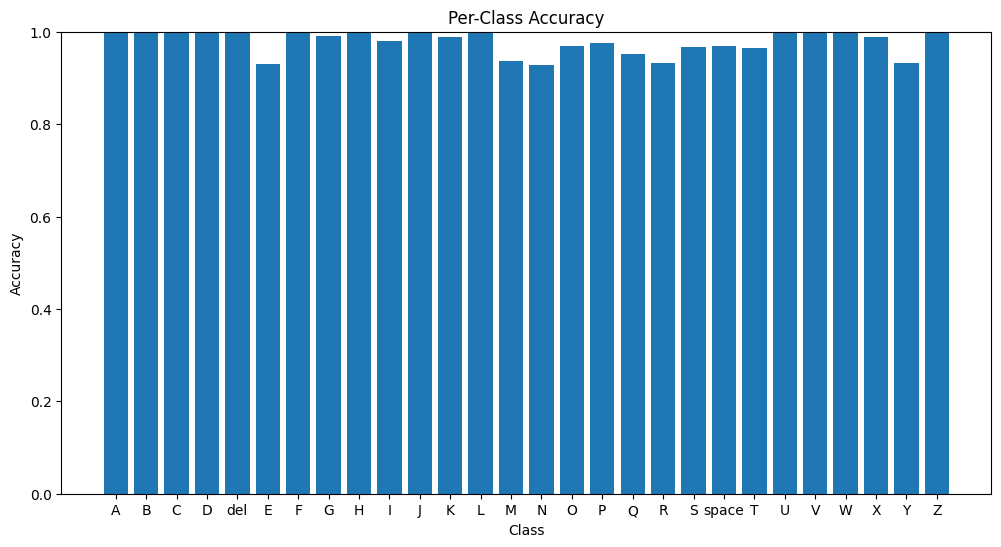

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Check and plot final testing accuracy
class_accuracies = {cls: accuracy_score(y_test[y_test == label_dict[cls]], y_pred[y_test == label_dict[cls]]) for cls in label_dict.keys()}

plt.figure(figsize=(12, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)
plt.show()